Step 1: Load Dataset

In [24]:
from nilmtk import DataSet
dataset = DataSet(r"C:\Users\Raymond Tie\Desktop\NILM\datasets\ukdale.h5")
building = dataset.buildings[1]
elec = building.elec

Step 2: Get the Actice Power in Main Meter

In [19]:

# Purpose: Get aggregate (input X)

mains = next(elec.mains().load(sample_period=6))
mains = mains.fillna(0)
if ('power','active') in mains.columns:
    X_main = mains[('power','active')].rename("mains_active")
else:
    X_main = mains.iloc[:,0].rename("mains_active")


c:\Users\Raymond Tie\Desktop\NILM\.venv\Lib\site-packages\nilmtk\utils.py:509: UserWarning: Found duplicate index. Keeping first value
  warnings.warn("Found duplicate index. Keeping first value")
c:\Users\Raymond Tie\Desktop\NILM\.venv\Lib\site-packages\nilmtk\utils.py:501: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  return fill_method(how(data.resample(rule, **resample_kwargs)))


Step3: Get the Targeted Appliances Active Power

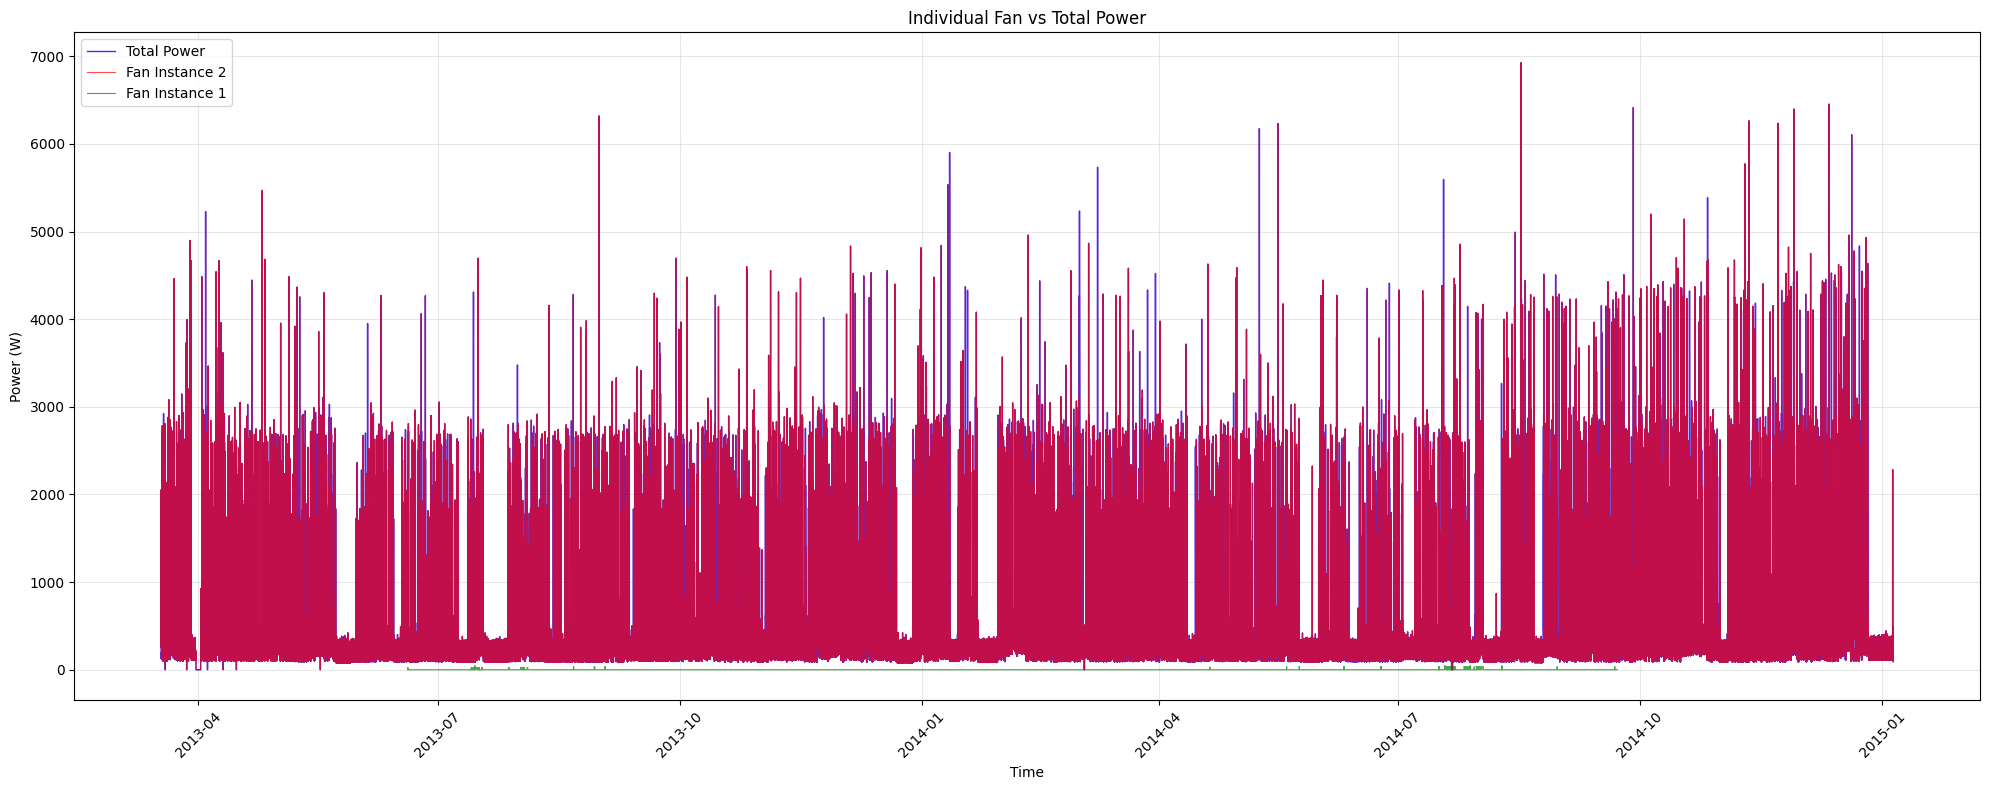

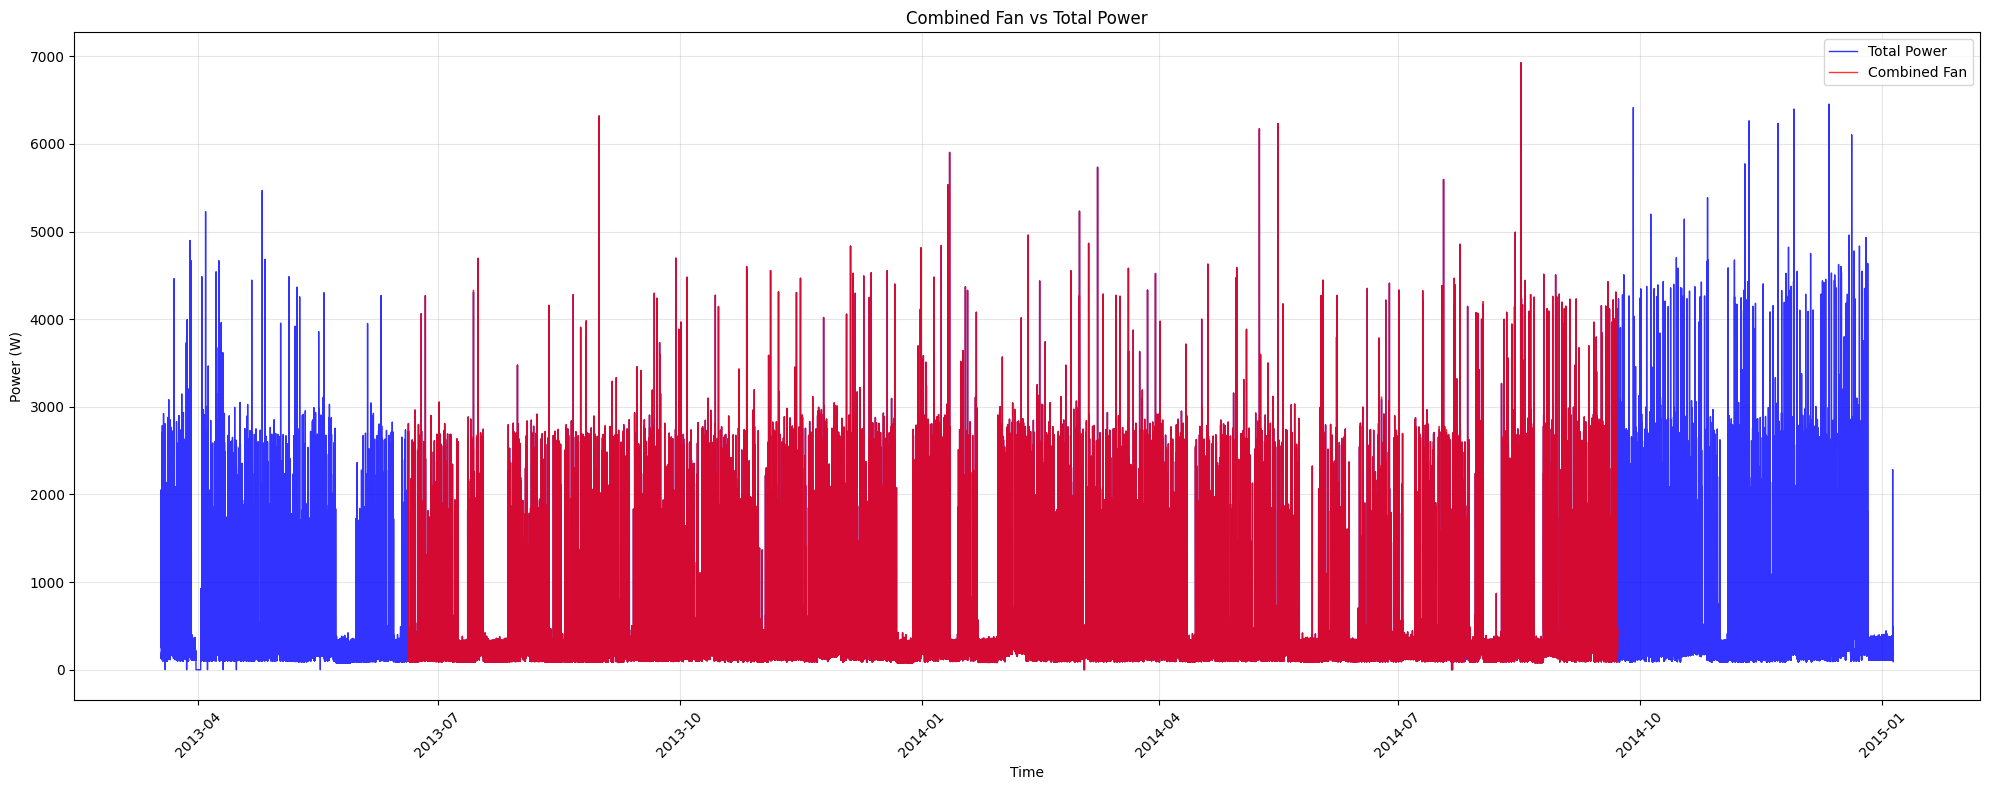

✅ Both plots completed with 9481946 data points each!


In [21]:
# SIMPLE PLOTTING: Total + Individual + Combined
import matplotlib.pyplot as plt

# Plot 1: Individual appliances vs total
plt.figure(figsize=(20, 8))
plt.plot(X_main.index[::50], X_main.values[::50], 'b-', linewidth=1, label='Total Power', alpha=0.8)

colors = ['red', 'green', 'orange', 'purple']
for i, (name, data) in enumerate(appliance_power_data.items()):
    plt.plot(data.index[::50], data.values[::50], color=colors[i%4], 
             linewidth=0.8, alpha=0.7, label=name.replace('_', ' ').title())

plt.title(f'Individual {target_appliance.title()} vs Total Power')
plt.xlabel('Time'); plt.ylabel('Power (W)')
plt.legend(); plt.grid(True, alpha=0.3)
plt.xticks(rotation=45); plt.tight_layout(); plt.show()

# Plot 2: Combined appliances vs total
plt.figure(figsize=(20, 8))
plt.plot(X_main.index[::50], X_main.values[::50], 'b-', linewidth=1, label='Total Power', alpha=0.8)

# Add all appliance power together
combined_power = sum(appliance_power_data.values())
plt.plot(combined_power.index[::50], combined_power.values[::50], 'r-', 
         linewidth=1, alpha=0.8, label=f'Combined {target_appliance.title()}')

plt.title(f'Combined {target_appliance.title()} vs Total Power')
plt.xlabel('Time'); plt.ylabel('Power (W)')
plt.legend(); plt.grid(True, alpha=0.3)
plt.xticks(rotation=45); plt.tight_layout(); plt.show()

print(f"✅ Both plots completed with {len(X_main)} data points each!")
